In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
import numpy as np

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'


mpl.rcParams["figure.figsize"] = (10, 6)
mpl.rcParams["font.size"] = 16
sns.set_theme()

### Estrutura dos Dados

$$xxxx.yyyy$$

- $xxxx$ representa o ano
- $yyyy$ é uma representação do mês

$$1/12 = 0.083333$$

Então a cada $0.083333$ há um mês.



In [2]:
passageiros = pd.read_csv("data/passageiros.csv")
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


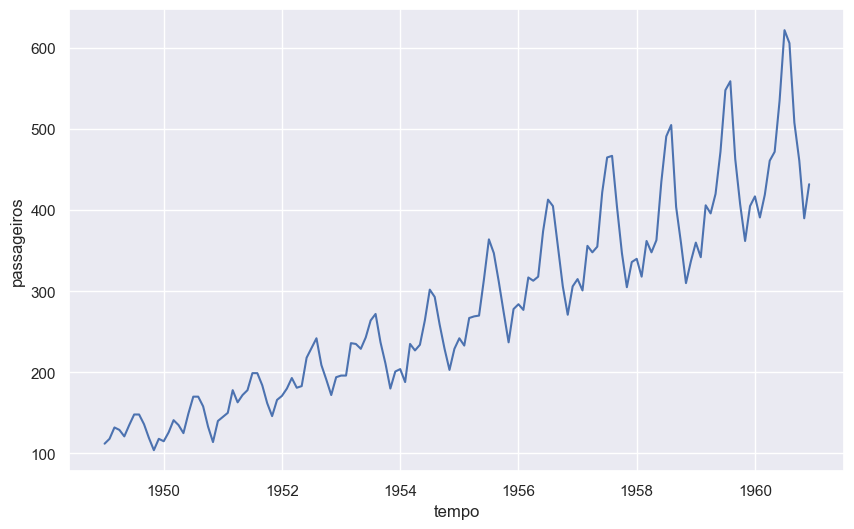

In [3]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros")
plt.show()

In [4]:
passageiros.columns

Index(['tempo', 'passageiros'], dtype='object')

In [5]:
sc = StandardScaler()
dado_escalado = sc.fit_transform(passageiros)

X = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'tempo')

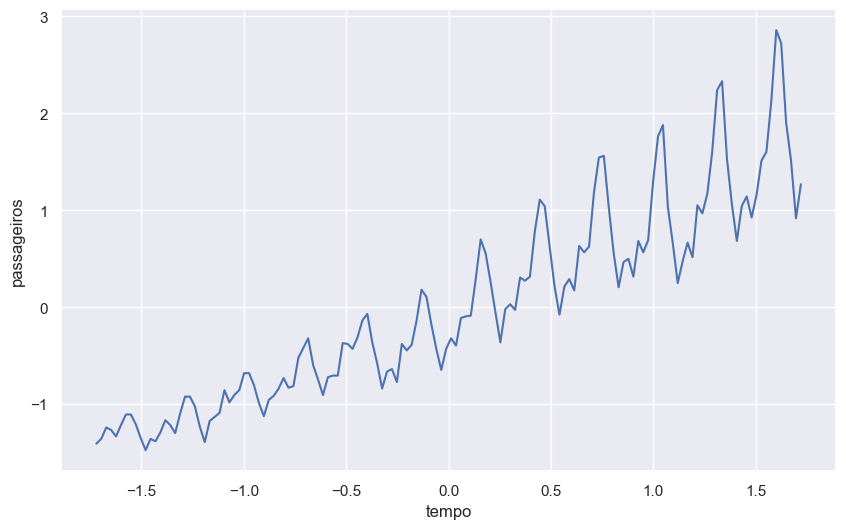

In [6]:
sns.lineplot(x=X, y=y)
plt.ylabel("passageiros")
plt.xlabel("tempo")

Can`t use train test split since we don't want to split random points and predict something in the middle. We want to understand the trend and then predict an interval in the future. This means that the test set shoudl be the last bit

In [7]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

X_train = X[0:tamanho_treino]
y_train = y[0:tamanho_treino]

X_test = X[tamanho_treino:len(passageiros)]
y_test = y[tamanho_treino:len(passageiros)]

<Axes: >

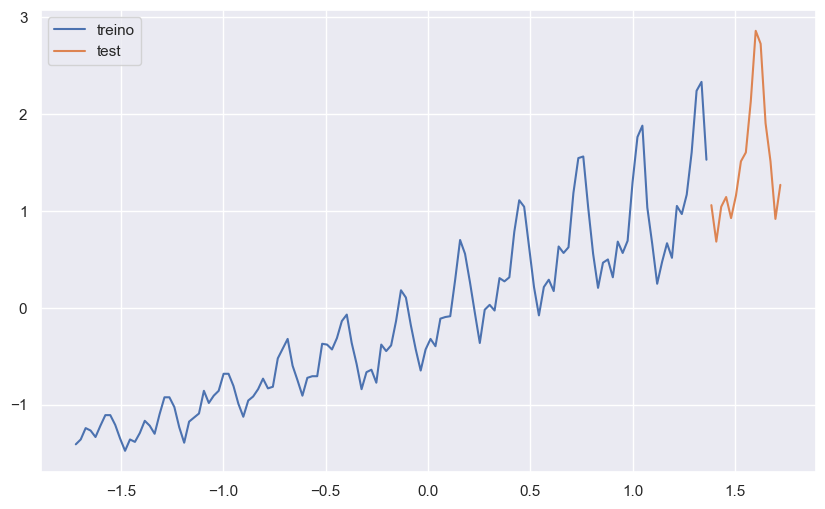

In [8]:
sns.lineplot(x=X_train, y=y_train, label="treino")
sns.lineplot(x=X_test, y=y_test, label="test")

# Linear Regression

In [9]:
from keras.models import Sequential
from keras.layers import Dense

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

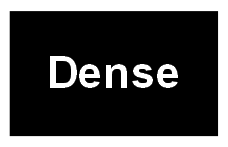

In [25]:
regressor = Sequential([
    Dense(1, input_dim=1, kernel_initializer="Ones",
          use_bias=True, activation="linear")
])

regressor.compile(loss="mean_squared_error", optimizer="adam")

regressor.summary()

keras.utils.plot_model(regressor)

In [11]:
regressor.fit(X_train, y_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1246  


In [12]:
y_predict = regressor.predict(X_train)
# y_predict.reshape(-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: >

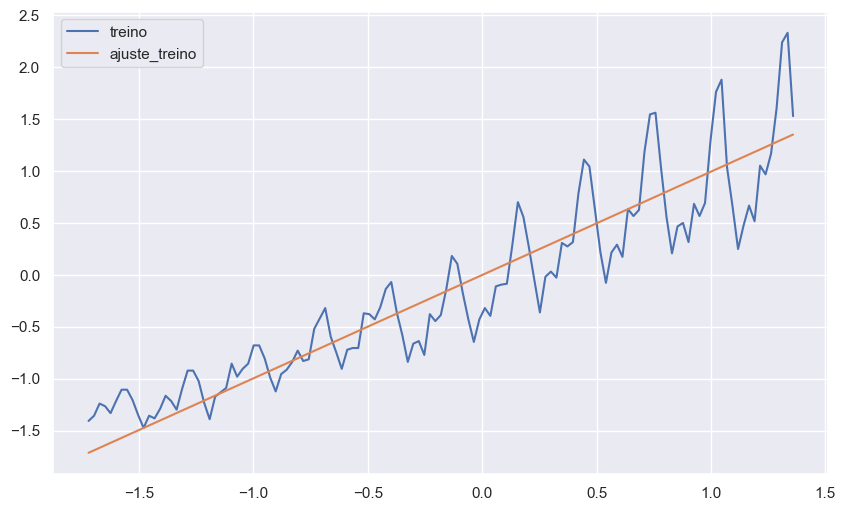

In [13]:

sns.lineplot(x=X_train, y=y_train, label="treino")
sns.lineplot(x=X_train, y=y_predict.reshape(-1), label="ajuste_treino")

### Retornando a Escala

In [14]:
d = {"tempo": X_train, "passageiros": y_predict.reshape(-1)}
resultados = pd.DataFrame(d)

resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf, columns=["tempo", "passageiros"])
resultados_transf

,tempo,passageiros
0,1949.000000,75.320113
1,1949.083333,78.183496
2,1949.166667,81.046878
3,1949.250000,83.910261
4,1949.333333,86.773644
...,...,...
124,1959.333333,430.379644
125,1959.416667,433.243027
126,1959.500000,436.106409
127,1959.583333,438.969792


<Axes: xlabel='tempo', ylabel='passageiros'>

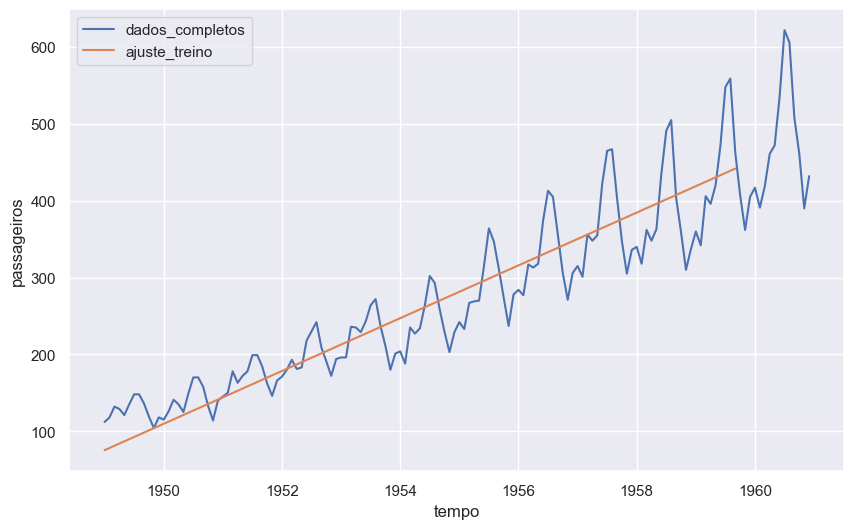

In [15]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", 
             label="dados_completos")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", 
             label="ajuste_treino")

In [16]:
y_predict_test = regressor.predict(X_test)

d = {"tempo": X_test, "passageiros": y_predict_test.reshape(-1)}
resultados_teste = pd.DataFrame(data=d)

resultados_transf_test = sc.inverse_transform(resultados_teste)
resultados_transf_test = pd.DataFrame(resultados_transf_test, 
                                      columns=["tempo", "passageiros"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


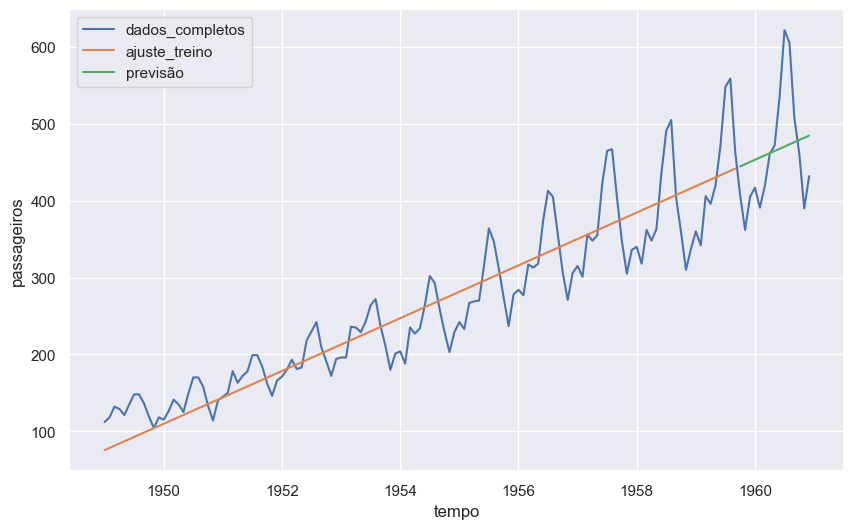

In [17]:
sns.lineplot(data=passageiros, x="tempo", y="passageiros", 
             label="dados_completos")
sns.lineplot(data=resultados_transf, x="tempo", y="passageiros", 
             label="ajuste_treino")
sns.lineplot(data=resultados_transf_test, x="tempo", y="passageiros",
             label="previsão")
plt.show()

# Multilayer Perceptron

In [36]:
regressor2 = Sequential([
    Dense(8, input_dim=1, kernel_initializer="random_uniform",
          activation="sigmoid", use_bias=True),
    Dense(8, kernel_initializer="random_uniform",
          activation="sigmoid", use_bias=True),
    Dense(1, kernel_initializer="random_uniform",
          activation="linear", use_bias=True)
])

regressor2.compile(loss="mean_squared_error", optimizer="adam")

regressor2.summary()

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
regressor2.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8692
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7497 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8564 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7804 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7744 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7385 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8097 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6814 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7497 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7393 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8799 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8287 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8076 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7264 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7972 
Epoch 16/200
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


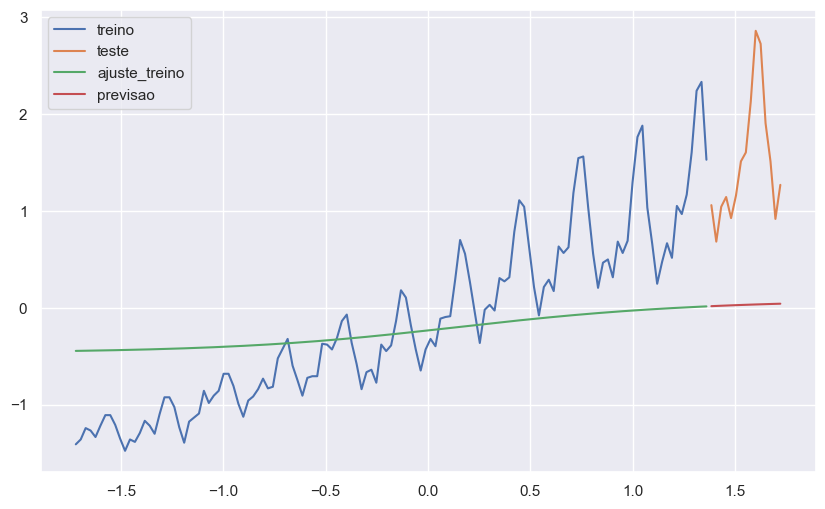

In [39]:
y_predict = regressor2.predict(X_train)
y_predict_test = regressor2.predict(X_test)

sns.lineplot(x=X_train, y=y_train, label="treino")
sns.lineplot(x=X_test, y=y_test, label="teste")
sns.lineplot(x=X_train, y=y_predict.reshape(-1), label="ajuste_treino")
sns.lineplot(x=X_test, y=y_predict_test.reshape(-1), label="previsao")

plt.show()

# Restructuring Data
From now on we'll use thre previous year number of passangers as input. As one does in time series problems

In [42]:
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

### Window = 1

In [53]:
vetor = pd.DataFrame(y_train)[0]
X_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [54]:
vetor2 = pd.DataFrame(y_test)[0]
X_teste_novo, y_test_novo = separa_dados(vetor2, 1)

In [55]:
regressor3 = Sequential([
    Dense(8, input_dim=1, kernel_initializer="Ones",
          activation="linear", use_bias=True),
    Dense(64, kernel_initializer="random_uniform",
          activation="sigmoid", use_bias=True),
    Dense(1, kernel_initializer="random_uniform",
          activation="linear", use_bias=True)
])

regressor3.compile(loss="mean_squared_error", optimizer="adam")

regressor3.summary()

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 657 (2.57 KB)

 Trainable params: 657 (2.57 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
regressor3.fit(X_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8027  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7751 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6546 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6528 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7385 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6299 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5734 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6290 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5819 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.5766
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5069 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4096 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4320 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3780 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3596 
Epoch 16/100
4/4 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Axes: xlabel='tempo', ylabel='0'>

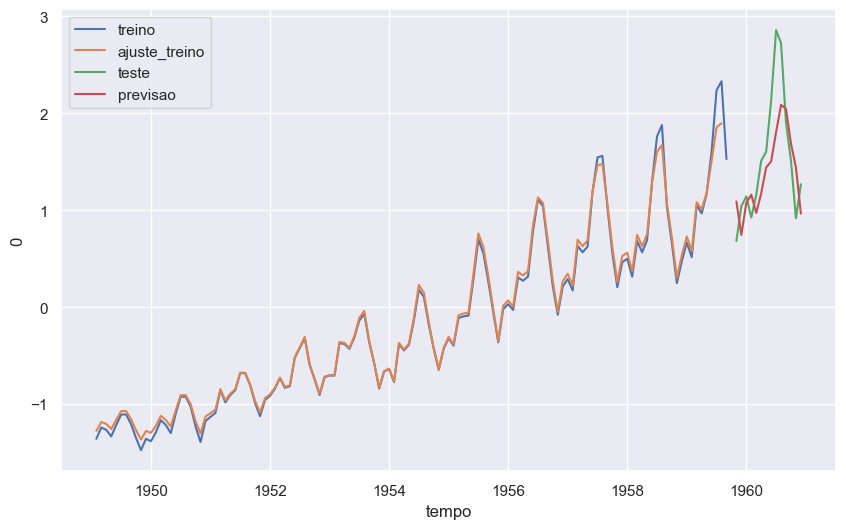

In [61]:
y_predict_novo = regressor3.predict(X_treino_novo)
y_predict_test_novo = regressor3.predict(X_teste_novo)

resultado = pd.DataFrame(y_predict_test_novo)[0]

sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[1:129], label="treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label="ajuste_treino")

sns.lineplot(x="tempo", y=y_test_novo, data=passageiros[130:144], label="teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[130:144], label="previsao")

### Window = 4

🔵 Notice that now that the window has length 4, we're looking at 4 previous points to predict the next one.
- This means that we've came from a model that has a single feature (previous value to predict the next) and gone to a problem where we're using 4 features, that last 4 values of passengers
  

In [67]:
vetor = pd.DataFrame(y_train)[0]
X_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [68]:
vetor2 = pd.DataFrame(y_test)[0]
X_teste_novo, y_test_novo = separa_dados(vetor2, 4)

In [83]:
regressor3 = Sequential([
    Dense(8, input_dim=4, kernel_initializer="Ones",
          activation="linear", use_bias=True),
    Dense(64, kernel_initializer="random_uniform",
          activation="sigmoid", use_bias=True),
    Dense(1, kernel_initializer="random_uniform",
          activation="linear", use_bias=True)
])

regressor3.compile(loss="mean_squared_error", optimizer="adam")

regressor3.summary()

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681 (2.66 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
regressor3.fit(X_treino_novo, y_treino_novo, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7934  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7191 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5956 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4749 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5481 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4324 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3817 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3278 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2288 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1989 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1519 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1650 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1481 
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1545 
Epoch 16/500
4/4 ━

In [95]:
pd.DataFrame(y_predict_novo)[0]

0     -1.182853
1     -1.259388
2     -1.155663
3     -1.035788
4     -1.039370
         ...   
120    1.040916
121    1.162322
122    1.504816
123    1.885448
124    1.918553
Name: 0, Length: 125, dtype: float32

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Axes: xlabel='tempo', ylabel='0'>

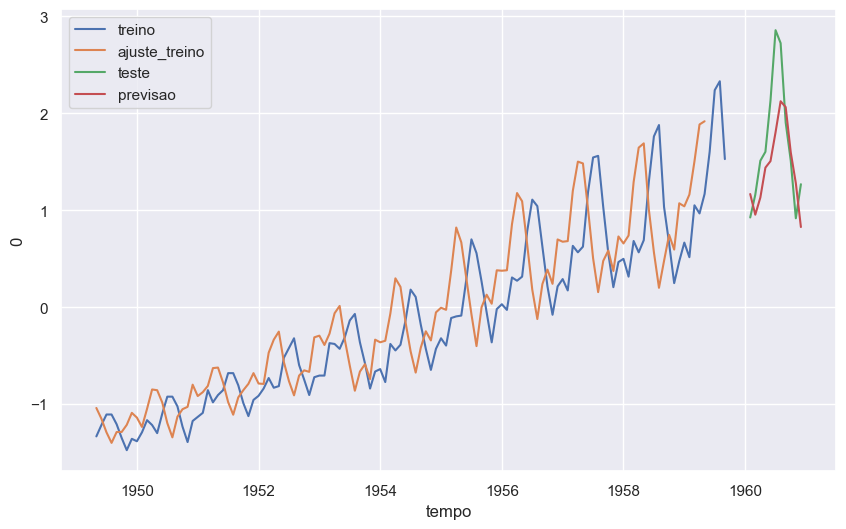

In [101]:
y_predict_novo = regressor3.predict(X_treino_novo)
y_predict_test_novo = regressor3.predict(X_teste_novo)

resultado = pd.DataFrame(y_predict_test_novo)[0]

sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[4:129], label="treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_predict_novo)[0], data=passageiros[4:129], label="ajuste_treino")

sns.lineplot(x="tempo", y=y_test_novo, data=passageiros[133:144], label="teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[133:144], label="previsao")